### Libs

In [0]:
import itertools

import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Task 1

Let's take a look at the data on the survival of patients with leukocyte lymphoma with the criteria: 49, 58, 75, 110, 112, 132, 151, 276, 281, 362 * The residual life time from the start of observation was measured (in weeks); the study lasted up to 7 years, unknown. To evaluate the hypothesis H0: medX = 200, the criterion of sign ranks can be used - it can be assumed that the patient's waiting time should be exactly 362, while this observation does not affect. Sign rank criteria test this hypothesis against a two-sided alternative, provide an achievable significance level, rounding to fourteen digits after the decimal point.

In [0]:
patients_data = np.array([49, 58, 75, 110, 112, 132, 151, 276, 281, 362])

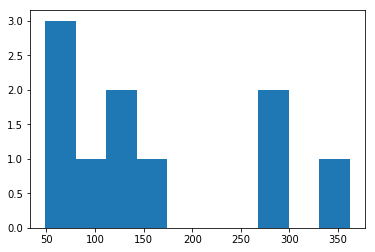

In [4]:
pylab.hist(patients_data)
pylab.show()

In [0]:
h0_med = 200.0

In [6]:
print ("M: %d, p-value: %f" % sign_test(patients_data, h0_med))

M: -2, p-value: 0.343750


In [7]:
stats.wilcoxon(patients_data - h0_med)

WilcoxonResult(statistic=17.0, pvalue=0.2845026979112075)

### Task 2


In the study of the impact of logging on the biodiversity of forests of the island of Borneo, data were collected on the number of tree species in 12 forests where deforestation is not carried out:

22, 22, 15, 13, 19, 19, 18, 20, 21, 13, 13, 15,22,22,15,13,19,19,18,20,21,13,13,15,

and in 9 forests where deforestation is taking place:

17, 18, 18, 15, 12, 4, 14, 15, 10.17,18,18,15,12,4,14,15,10.

Test the hypothesis that the average number of species is equal in two types of forests versus the one-sided alternative of reducing biodiversity in deforestation.
Use rank criteria. What is the achieved significance level? Round up to four digits after the decimal point.

In [0]:
forest_not_cut_species_rate = np.array([22, 22, 15, 13, 19, 19, 18, 20, 21, 13, 13, 15,22,22,15,13,19,19,18,20,21,13,13,15])
forest_cut_species_rate = np.array([17, 18, 18, 15, 12, 4, 14, 15, 10.17,18,18,15,12,4,14,15,10])


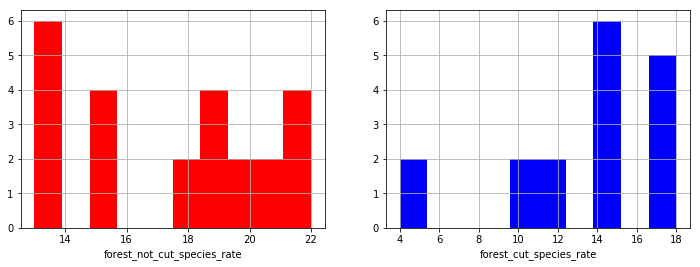

In [9]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(forest_not_cut_species_rate, color = 'r')
pylab.xlabel('forest_not_cut_species_rate')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(forest_cut_species_rate, color = 'b')
pylab.xlabel('forest_cut_species_rate')

pylab.show()

In [10]:
print (f'95%% confidence interval for the mean of not cutted forest: {zconfint(forest_not_cut_species_rate)}')

95%% confidence interval for the mean of not cutted forest: (16.119126696149653, 18.880873303850347)


In [11]:
print (f'95%% confidence interval for the mean of cutted forest: {zconfint(forest_cut_species_rate)}')

95%% confidence interval for the mean of cutted forest: (11.384539263917045, 15.576637206671194)


In [12]:
stats.mannwhitneyu(forest_not_cut_species_rate, forest_cut_species_rate)

MannwhitneyuResult(statistic=98.0, pvalue=0.0024476071679050988)

### Task 3

On January 28, 1986, the space shuttle Challenger exploded on takeoff. Seven astronauts aboard were killed. During the investigation of the causes of the disaster, the main version was a malfunction with rubber o-rings in connection with rocket boosters. For the 23 previous Challenger flights, the air temperature and the occurrence of damage to at least one of the o-rings are known.

Using a bootstrap, build a 95% confidence interval for the difference in average air temperatures during starts when the o-rings are damaged and starts when there is no damage. What is its border closest to zero? Round up to four decimal places.

Make 1000 pseudo-samples from each sample.

In [0]:
temperature_data = pd.read_csv('https://raw.githubusercontent.com/OzmundSedler/100-Days-Of-ML-Code/master/week_11/datasets/challenger.txt', sep='\t', index_col=0)

In [14]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, Apr12.81 to Jan12.86
Data columns (total 2 columns):
Temperature    23 non-null float64
Incident       23 non-null int64
dtypes: float64(1), int64(1)
memory usage: 552.0+ bytes


In [15]:
temperature_data.head()

,Temperature,Incident
Apr12.81,18.9,0
Nov12.81,21.1,1
Mar22.82,20.6,0
Nov11.82,20.0,0
Apr04.83,19.4,0


In [0]:
succeeded_launches_temperature = temperature_data[temperature_data['Incident']==0]['Temperature']
failed_launches_temperature = temperature_data[temperature_data['Incident']==1]['Temperature']

In [0]:
succeeded_launches_temperature_mean = succeeded_launches_temperature.mean()
failed_launches_temperature_mean = failed_launches_temperature.mean()

In [18]:
print (f'Succeeded Launches Temperature Mean: {succeeded_launches_temperature_mean}')
print (f'Failed Launches Temperature Mean: {failed_launches_temperature_mean}')

Succeeded Launches Temperature Mean: 22.28125
Failed Launches Temperature Mean: 17.614285714285717


In [0]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [0]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [0]:
np.random.seed(0)
failed_launches_temperature_bs_mean = np.array(list(map(np.mean, get_bootstrap_samples(failed_launches_temperature.values, 1000))))
succeeded_launches_temperature_bs_mean = np.array(list(map(np.mean, get_bootstrap_samples(succeeded_launches_temperature.values, 1000))))

In [22]:
print('95%% confidence interval for times decrease of infarction: %s' %
      str(stat_intervals(failed_launches_temperature_bs_mean - succeeded_launches_temperature_bs_mean, 0.05)))

95% confidence interval for times decrease of infarction: [-8.06457589 -1.45040179]


On the data of the previous task, check the hypothesis about the same average air temperature in the days when the o-rings were damaged, and the days when there was no damage. Use a permutation criterion and a two-way alternative. What is the achieved significance level? Round up to four digits after the decimal point.

To get the same value as us:

set random seed = 0;
take 10,000 permutations.

In [0]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [0]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [0]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations=None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [0]:
def permutation_test(sample, mean, max_permutations = None, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [27]:
np.random.seed(0)
print('p-value: %.4f' % permutation_test(failed_launches_temperature,
                                         succeeded_launches_temperature,
                                         max_permutations=10000))

p-value: 0.0057
